In [2]:
# webscrape 20 images each of 10 characters
# save images to folder

import os
from bing_image_downloader import downloader
import shutil

# create folder to save images if it doesn't exist
if not os.path.exists('images'):
    os.mkdir('images')

# create list of characters
characters = ['Narendra Modi', 'Leonardo DiCaprio', 'Tom Cruise']

In [3]:
# %%script false --no-raise-error
# delete all folders which are not in characters
for folder in os.listdir('images'):
    if folder not in characters:
        shutil.rmtree('images/' + folder)
# loop through each character
for character in characters:
    # download 20 images of each character
    downloader.download(character+" face", limit=10, output_dir='images/', adult_filter_off=True, force_replace=False, timeout=60, verbose=False, filter="photo")

[%] Downloading Images to d:\DSLab\ML\EigenFaces\images\Narendra Modi face


[%] Done. Downloaded 10 images.
[%] Downloading Images to d:\DSLab\ML\EigenFaces\images\Leonardo DiCaprio face
[!] Issue getting: https://www.partypeople.company/uploads/1/7/6/2/17627711/s454377924454347902_p98_i66_w826.jpeg
[!] Error:: HTTP Error 404: Not Found
[!] Issue getting: https://all4desktop.com/data_images/original/4242435-face.jpg
[!] Error:: <urlopen error [Errno 2] No such file or directory>
[!] Issue getting: https://media1.popsugar-assets.com/files/thumbor/TAacQINMC2pS4Ggt8Jcv7T7NvnQ/fit-in/1024x1024/filters:format_auto-!!-:strip_icc-!!-/2017/02/24/238/n/4852708/5519575d2a9db159_GettyImages-111153410/i/Cute-Pictures-Leonardo-DiCaprio-Face.jpg
[!] Error:: HTTP Error 502: Bad Gateway
[!] Issue getting: https://media1.popsugar-assets.com/files/thumbor/wDA3EMqpx67W9XGIq_RoEq2hcBc/fit-in/1024x1024/filters:format_auto-!!-:strip_icc-!!-/2017/02/24/238/n/4852708/f591800dcaba7f6c_GettyImages-614904228/i/

In [3]:
# create face only images
import cv2
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')

# delete and recreate images_512_face folder
if os.path.exists('images_512_face'):
    shutil.rmtree('images_512_face')
os.mkdir('images_512_face')

for folder in os.listdir('images_512_face'):
    if folder not in characters:
        shutil.rmtree('images_512_face/' + folder)

# loop through each character
for character in characters:
    # create folder to save images if it doesn't exist
    if not os.path.exists('images_512_face/' + character):
        os.mkdir('images_512_face/' + character)
    # loop through each image
    for image in os.listdir('images/' + character+" face"):
        try:
            # read image
            imgOG = cv2.imread('images/' + character+" face" + '/' +image)
            #read img but as grayscale
            img = cv2.imread('images/' + character+" face" + '/' +image, 0)
            # # Convert into grayscale
            # img = cv2.cvtColor(imgOG, cv2.COLOR_BGR2GRAY)
            # detect faces
            result = face_cascade.detectMultiScale3(img, 1.1, 4, outputRejectLevels=True)
            face=result[0]
            levelWeight=result[2]
            #skip example if confidence not high enough
            if len(face) == 0 or max(levelWeight) < 0.5:
                raise Exception("No face detected")
            #crop face
            for (x, y, w, h) in face:
                imgOG = imgOG[y:y+h, x:x+w]
            # resize image
            imgOG = cv2.resize(imgOG, (256, 256))
            # save image
            cv2.imwrite('images_512_face/' + character + '/' + image, imgOG)
        except Exception as e:
            print(e)
            pass


No face detected
No face detected


In [4]:
# create dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df=pd.DataFrame()
y=pd.DataFrame(columns=['character'])

def clamp(n, minn, maxn): return max(min(maxn, n), minn)

# loop through every image
for character in characters:
    for image in os.listdir('images_512_face/' + character):
        # read image as grayscale
        img = cv2.imread('images_512_face/' + character + '/' + image, 0)
        #flatten image
        imgFlat = img.flatten()
        # add image to dataset
        df = pd.concat([df, pd.DataFrame(imgFlat).T], ignore_index=True)
        # add label to y
        y = pd.concat([y, pd.DataFrame([character], columns=['character'])], ignore_index=True)
df

,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
0,4,23,4,46,20,116,35,100,168,183,...,6,9,10,7,7,5,6,7,5,6
1,0,0,141,253,247,239,235,237,234,233,...,0,0,0,0,0,0,0,0,0,0
2,66,58,54,56,54,54,50,55,54,57,...,199,199,200,200,200,199,199,200,201,201
3,5,6,6,6,5,6,5,4,5,7,...,16,15,17,18,21,19,21,19,20,20
4,26,19,41,85,154,158,149,148,204,221,...,117,110,122,83,110,105,118,134,87,126
5,2,2,2,2,2,2,2,2,3,1,...,3,3,3,3,3,3,3,3,3,3
6,255,255,254,249,237,228,227,223,219,216,...,166,168,163,165,164,168,172,176,174,175
7,56,54,52,52,54,54,54,54,55,55,...,24,23,24,24,24,24,24,23,23,22
8,70,50,43,80,71,58,59,59,62,64,...,40,40,40,39,39,39,39,39,38,37
9,4,0,0,1,3,2,0,1,12,5,...,0,0,0,0,0,0,0,0,0,0


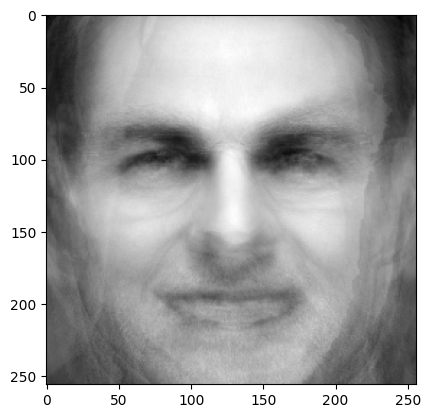

In [5]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
# calculate mean of each column
mean = df.mean(axis=0)
#show mean face by unflattening
plt.imshow(mean.values.reshape(256, 256), cmap='gray')
#function to do PCA with given number of components
from sklearn.decomposition import PCA
def doPCA(n, X_train):
    pca = PCA(n_components=n)
    pca.fit(X_train)
    return pca

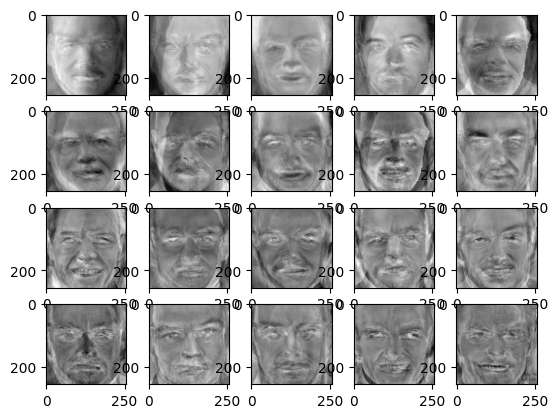

In [22]:
n=20
# Do PCA with n components
pca = doPCA(n, X_train)
#show eigenfaces by unflattening in 2x5 grid
for i in range(n):
    plt.subplot(n//5, 5, i+1)
    plt.imshow(pca.components_[i].reshape(256, 256), cmap='gray')
plt.show()


(1, 20) (20, 65536)


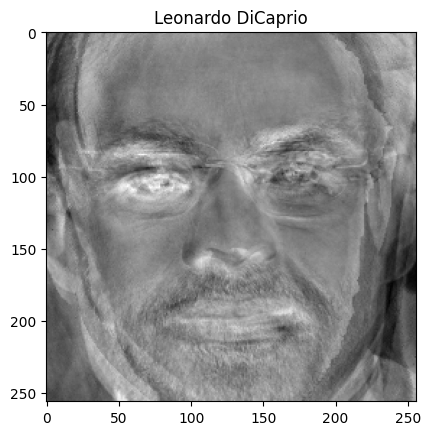

(1, 20) (20, 65536)


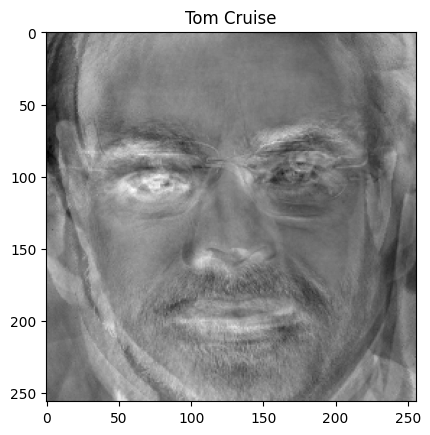

(1, 20) (20, 65536)


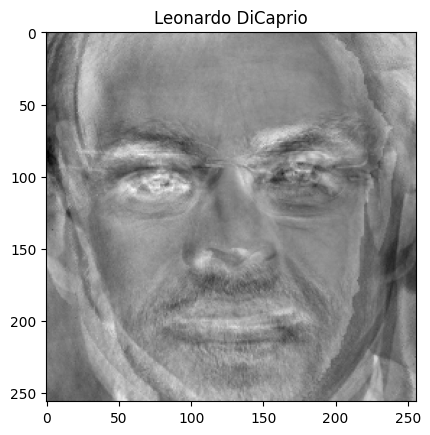

(1, 20) (20, 65536)


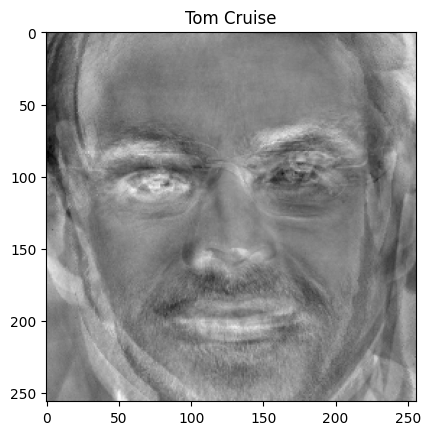

(1, 20) (20, 65536)


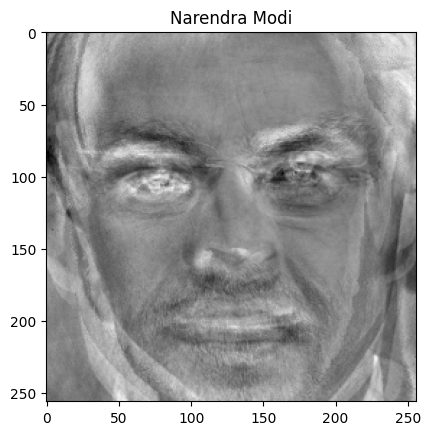

In [23]:
# Identify faces in test set
# loop through each image in test set
for i in range(min(len(X_test),5)):
    # get image
    img=X_test.iloc[i]
    # get label
    label=y_test.iloc[i]['character']
    # subtract mean
    img = img - mean
    # project onto eigenfaces
    img = pca.transform(img.values.reshape(1, -1))
    # projection matrix
    W = pca.components_
    # reconstruct image
    print(img.shape, W.shape)
    img=np.matmul(img, W)
    # show image
    plt.imshow(img.reshape(256, 256), cmap='gray')
    plt.title(label)
    plt.show()
